## Machine Learning
### Ridge regression with least squares
In **Ridge Regression** similar to the *linear regression*, we use a linear model for the the data points:
<br> $y=w_0+w_1x_1+w_2x_2+....w_{p-1}x_{p-1}$
<br>Having data points $(\boldsymbol{x}_i,y_i)$ we want to find the best estimate for parameter vector $\boldsymbol{w}$ using the **least squares method** augmented with a penalty term called **regularization term** as shown below:<br>
$L_{Ridge}(\boldsymbol{w})=||\boldsymbol{y}-X\boldsymbol{w}||^2+\lambda ||\boldsymbol{w}||^2$
<br>Minimizing the loss function $L_{Ridge}(\boldsymbol{w})$ leads to: <br>
$\boldsymbol{w}=(X^TX+\lambda I)^{-1}X^T\boldsymbol{y}$ <br>
where $I$ is the identity matrix, and $\lambda\ge0$ is the regularization (ridge) parameter.
<br> **Reminder:** The rows of matrix $X$ are composed of $\boldsymbol{x}_i$ such the the first column is all one.
<hr>
The Python code at: https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/

In [1]:
# importing required modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# least squares estimator for (p-1)-dimensional data points xi
# computes the ridge matrix of the given matrix X
def ridge_matrix(X,landa=.1):
    p=X.shape[1]
    I=np.identity(p)
    return np.linalg.inv(X.T@X+landa*I)@X.T

# Xs is a matrix with n rows and p-1 columns
# ys is a column vector of size n holding the dependent values yi
def least_squares_estimator(Xs,ys):
    X=np.ones((Xs.shape[0],Xs.shape[1]+1))
    X[:,1:]=Xs.copy()
    w=ridge_matrix(X)@ys.reshape(-1,1)
    return w.flatten()

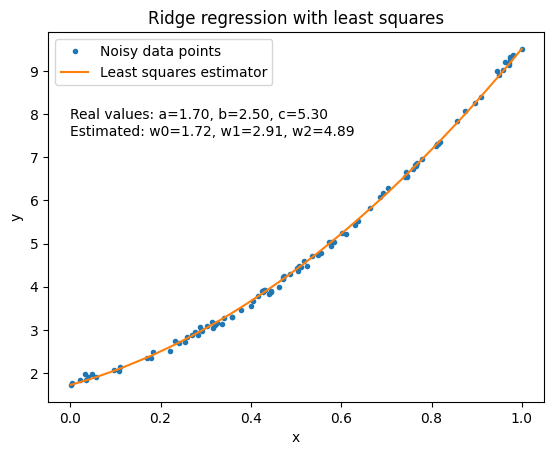

In [3]:
# example
a,b,c,noise,Ndata,p=1.7,2.5,5.3,.2,100,3
xs=np.random.rand(Ndata)
Xs=np.zeros((len(xs),p-1))
Xs[:,0]=xs.copy()
Xs[:,1]=Xs[:,0]**2
ys=a+b*xs+c*xs**2+noise*np.random.rand(Ndata)
a_hat,b_hat,c_hat=least_squares_estimator(Xs,ys)
xss=np.sort(xs)
ys_hat=a_hat+b_hat*xss+c_hat*xss**2
plt.plot(xs,ys,'.',label='Noisy data points')
plt.plot(xss,ys_hat,'-',label='Least squares estimator')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()
plt.title('Ridge regression with least squares')
plt.text(0,7.9,f'Real values: a={a:.2f}, b={b:.2f}, c={c:.2f}')
plt.text(0,7.5,f'Estimated: w0={a_hat:.2f}, w1={b_hat:.2f}, w2={c_hat:.2f}')
plt.show()